In [1]:
# Breast cancer prediction project with 5 models with hyper tuning, confusion matrix, accuracy score,best estimators.
#with visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\pc\Downloads\breast_cancer.csv")


In [3]:
x=df.iloc[:,:-1].values


In [4]:
y=df.iloc[:,-1].values


In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [6]:
xtest

array([[ 653777,       8,       3, ...,       3,       3,       1],
       [1187805,       8,       8, ...,       7,       8,       7],
       [1223426,       1,       1, ...,       3,       1,       1],
       ...,
       [1110503,       5,       5, ...,       7,       3,       7],
       [1223282,       1,       1, ...,       2,       1,       1],
       [1328755,       3,       1, ...,       2,       1,       1]])

In [7]:
ytest

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2])

In [8]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
xtrain = se.fit_transform(xtrain)
xtest = se.transform(xtest)

In [10]:
#principal component Analysis
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
xtrain=pca.fit_transform(xtrain)
xtest = pca.transform(xtest)


In [11]:
# model with hyper parameter tuning values
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=np.float64(0.012742749857031334), class_weight='balanced',
                   l1_ratio=0.5, max_iter=50, penalty='elasticnet',
                   random_state=42, solver='saga')
lgr.fit(xtrain,ytrain)


LogisticRegression(C=np.float64(0.012742749857031334), class_weight='balanced',
                   l1_ratio=0.5, max_iter=50, penalty='elasticnet',
                   random_state=42, solver='saga')

In [15]:
# confusion matrix, Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
ypred = lgr.predict(xtest)
cmlgr= confusion_matrix(ytest,ypred)
aclgr=accuracy_score(ytest,ypred)
print(aclgr)
print(cmlgr)


0.9635036496350365
[[78  1]
 [ 4 54]]


In [19]:
#Grid search cv for LogisticRegression 

from sklearn.model_selection import GridSearchCV

parameters = [ {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20), 
     "dual": [True,False],
    "tol":[0.0001,0.001],
    'solver': ['liblinear', 'saga'], # Example: choose solvers compatible with penalties
    'l1_ratio': [0.1, 0.5, 0.9], # Only for elasticnet penalty
    'max_iter':[50]
}]
grid = GridSearchCV(estimator=lgr,param_grid=parameters,scoring="accuracy")


In [20]:
grid.fit(xtrain,ytrain)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'dual': [True, False], 'l1_ratio': [0.1, 0.5, 0.9],
                          'max_iter': [50],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['liblinear', 'saga'],
                          'tol': [0.0001, 0.001]}],
             scoring='accuracy')

In [21]:
acc = grid.best_score_
acc

np.float64(0.9652210175145954)

In [22]:
pa =grid.best_params_
pa

{'C': np.float64(0.012742749857031334),
 'dual': False,
 'l1_ratio': 0.5,
 'max_iter': 50,
 'penalty': 'elasticnet',
 'solver': 'saga',
 'tol': 0.0001}

In [23]:
grid.best_estimator_

LogisticRegression(C=np.float64(0.012742749857031334), class_weight='balanced',
                   l1_ratio=0.5, max_iter=50, penalty='elasticnet',
                   random_state=0, solver='saga')

In [26]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=lgr,X=xtrain,y=ytrain,cv=10)
scores=scores.mean()

In [27]:
scores

np.float64(0.9652188552188553)

In [188]:
#gradient boosting CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, n_estimators=10,
                           random_state=0)
gbr.fit(xtrain, ytrain)
gbr.predict(se.transform(xtest))
#gbr.score(X_test, y_test)

array([4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 4, 4, 2, 4])

In [190]:
#confusion matrix and accuracy score
ypred = gbr.predict(xtest)
cmgbr= confusion_matrix(ytest,ypred)
acgbr=accuracy_score(ytest,ypred)
print(acgbr)
print(cmgbr)

0.9416058394160584
[[90  0]
 [ 8 39]]


In [62]:
# gridsearch cv for Gradientboost
from sklearn.model_selection import GridSearchCV

parameters = [ {
    'learning_rate':[0.1,0.05,0.01],
    'n_estimators':[10],
     'max_depth':[3,5,7],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,4]
}]
grid = GridSearchCV(estimator=gbr,param_grid=parameters,scoring="accuracy")


In [63]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(max_depth=1, random_state=0),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01],
                          'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [10]}],
             scoring='accuracy')

In [76]:
acc = grid.best_score_
acc

np.float64(0.9634028356964137)

In [65]:
pa =grid.best_params_
pa

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [66]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, n_estimators=10,
                           random_state=0)

In [121]:
from sklearn.model_selection import cross_val_score
scoresgbr=cross_val_score(estimator=gbr,X=xtrain,y=ytrain,cv=10)
scoresgbr=scores.mean()

In [139]:
scoresgbr #gradient boosting classifier

np.float64(0.9652188552188553)

In [191]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=0)
dct=dct.fit(xtrain,ytrain)
dct.predict(se.transform(xtest))

array([2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4])

In [192]:
#confusion matrix and accuracy score
ypred = dct.predict(xtest)
cmdct= confusion_matrix(ytest,ypred)
acdct=accuracy_score(ytest,ypred)
print(acdct)
print(cmdct)

0.8978102189781022
[[83  7]
 [ 7 40]]


In [78]:
#gridsearchcv for decision tree

parameters=[{
    'criterion':['gini','entropy'],
    'max_depth':[None,3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':[None,'auto','sqrt','log2']}]
grid = GridSearchCV(estimator=dct,param_grid=parameters,scoring="accuracy")


In [79]:
grid.fit(xtrain,ytrain)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 3, 5, 7],
                          'max_features': [None, 'auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10]}],
             scoring='accuracy')

In [80]:
acc = grid.best_score_
acc

np.float64(0.961584653878232)

In [81]:
pa =grid.best_params_
pa

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [82]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=0)

In [85]:
from sklearn.model_selection import cross_val_score
scoresdct=cross_val_score(estimator=dct,X=xtrain,y=ytrain,cv=10)
scoresdct=scores.mean()


In [86]:
scoresdct

np.float64(0.9597643097643097)

In [193]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing= 1e-09)
gnb.fit(xtrain,ytrain)
gnb.predict(se.transform(xtest))


array([2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4])

In [194]:
# Confusion matrix and accuracy score for Naive Bayes
ypred = gnb.predict(xtest)
cmgnb = confusion_matrix(ytest,ypred)
acgnb= accuracy_score(ytest,ypred)
print(acgnb)
print(cmgnb)

0.9197080291970803
[[90  0]
 [11 36]]


In [89]:
#gridsearcgcv for Naive bayes
parameters= [{
    'var_smoothing': [1e-9,1e-8,1e-7,1e-6]

}]
grid = GridSearchCV(estimator=gnb,param_grid=parameters,scoring="accuracy")


In [90]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=GaussianNB(),
             param_grid=[{'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]}],
             scoring='accuracy')

In [91]:
acc = grid.best_score_
acc

np.float64(0.9414011676396997)

In [92]:
pa=grid.best_params_
pa

{'var_smoothing': 1e-09}

In [94]:
grid.best_estimator_

GaussianNB()

In [128]:
#cross validator for Naive bayes
from sklearn.model_selection import cross_val_score
scoresgnb=cross_val_score(estimator=gnb,X=xtrain,y=ytrain,cv=10)
scoresgnb=scores.mean()

In [129]:
scoresgnb

np.float64(0.9652188552188553)

In [195]:
#adaboost classifier

from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, random_state=42)
abc.fit(xtrain,ytrain)
abc.predict(se.transform(xtest))

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


array([2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 4, 2, 4])

In [196]:
# confusion matrix and accuracy score for Ada boost
ypred = abc.predict(xtest)
cm = confusion_matrix(ytest,ypred)
acabc=accuracy_score(ytest,ypred)
print(acabc)
print(cm)

0.9343065693430657
[[85  5]
 [ 4 43]]


In [116]:
# gridsearchcv for Ada boost classifier
parameters= [{
    'n_estimators': [50,100,200],
    'learning_rate': [0.1,0.5,1],
    'algorithm': ['SAMME', 'SAMME.R']

}]
grid = GridSearchCV(estimator=abc,param_grid=parameters,scoring="accuracy")


In [107]:
grid.fit(xtrain,ytrain)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100, random_state=42),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.1, 0.5, 1],
                          'n_estimators': [50, 100, 200]}],
             scoring='accuracy')

In [108]:
acc=grid.best_score_
acc

np.float64(0.965237698081735)

In [109]:
pa=grid.best_params_
pa

{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}

In [113]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, random_state=42)

In [124]:
#cross validation for Adaboost classifier
scoresabc=cross_val_score(estimator=abc,X=xtrain,y=ytrain,cv=10)
scoresabc=scores.mean()

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

In [130]:
scoresabc

np.float64(0.9652188552188553)

In [131]:
scores,scoresgbr,scoresdct,scoresgnb,scoresabc

(np.float64(0.9652188552188553),
 np.float64(0.9652188552188553),
 np.float64(0.9597643097643097),
 np.float64(0.9652188552188553),
 np.float64(0.9652188552188553))

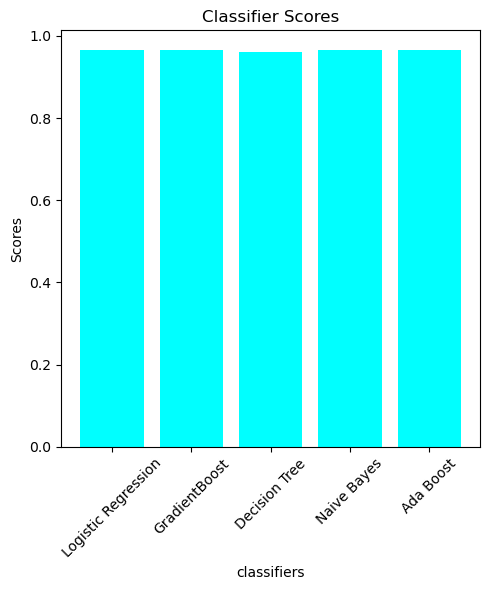

In [136]:
#graph using cross validator score
classifiers=["Logistic Regression","GradientBoost","Decision Tree","Naive Bayes","Ada Boost"]
scores=[0.9652188552188553,0.9652188552188553,0.9597643097643097,0.9652188552188553,0.9652188552188553]
plt.figure(figsize=(5,6))
plt.bar(classifiers,scores,color='cyan')
plt.xlabel("classifiers")
plt.ylabel("Scores")
plt.title("Classifier Scores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [197]:
aclgr,acgbr,acdct,acgnb,acabc

(0.9854014598540146,
 0.9416058394160584,
 0.8978102189781022,
 0.9197080291970803,
 0.9343065693430657)

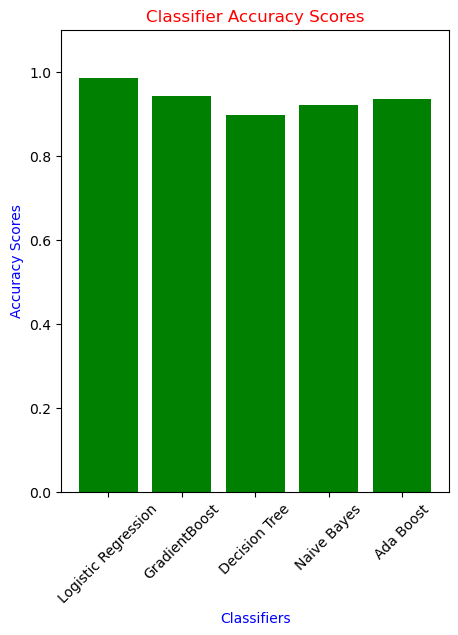

In [204]:
classifiers=["Logistic Regression","GradientBoost","Decision Tree","Naive Bayes","Ada Boost"]
Acc_scores=[0.9854,
 0.9416,
 0.8978,
 0.9197,
 0.9343]
plt.figure(figsize=(5,6))
plt.bar(classifiers,Acc_scores,color='green')
plt.xlabel("Classifiers", color="blue",fontsize=10)
plt.ylabel("Accuracy Scores", color="blue",fontsize=10)
plt.title("Classifier Accuracy Scores", color="red")
plt.xticks(rotation=45)

plt.ylim(0,1.1)

plt.show()